In [1]:
# CÉLULA 1: Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CÉLULA 2: Carregar e processar dados

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25
df['overweight'] = df['overweight'].astype(int)

# Normalize data
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Clean the data
df = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

print("Dataset shape:", df.shape)
print("Primeiras 5 linhas:")
print(df.head())

Dataset shape: (63259, 14)
Primeiras 5 linhas:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   

   alco  active  cardio  overweight  
0     0       1       0           0  
1     0       1       1           1  
2     0       0       1           0  
3     0       1       1           1  
4     0       0       0           0  


In [3]:
# CÉLULA 3: Definir função do gráfico categórico
def draw_cat_plot():
    df_cat = pd.melt(df, 
                     id_vars=['cardio'], 
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    fig = sns.catplot(data=df_cat, 
                      x='variable', 
                      y='total', 
                      hue='value', 
                      col='cardio', 
                      kind='bar')
    
    fig = fig.fig
    fig.savefig('catplot.png')
    return fig

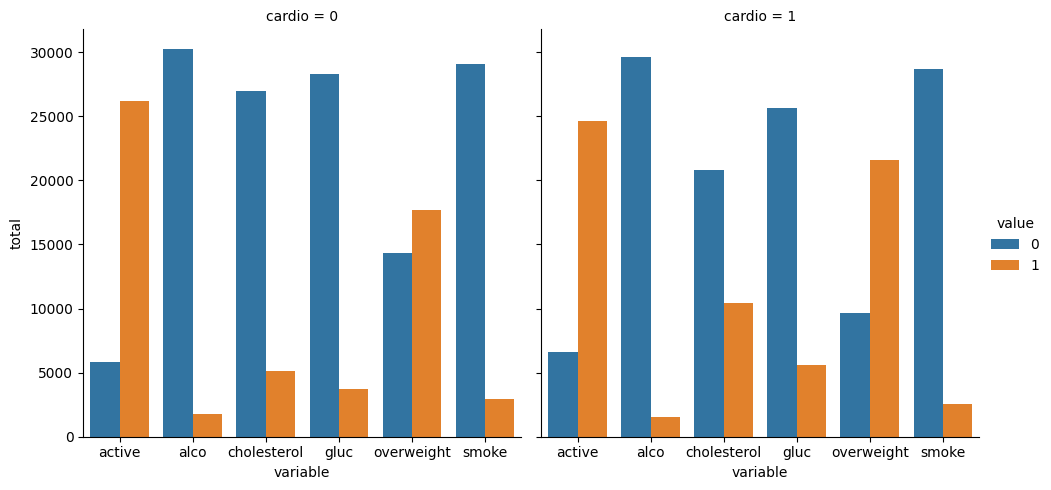

Gráfico categórico criado!


In [4]:
# CÉLULA 4: Executar gráfico categórico
cat_fig = draw_cat_plot()
plt.show()
print("Gráfico categórico criado!")

In [5]:
# CÉLULA 5: Definir função do mapa de calor
def draw_heat_map():
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    sns.heatmap(corr, 
                mask=mask, 
                annot=True, 
                fmt='.1f', 
                center=0, 
                square=True, 
                linewidths=0.5, 
                cbar_kws={"shrink": 0.5},
                ax=ax)
    
    fig.savefig('heatmap.png')
    return fig

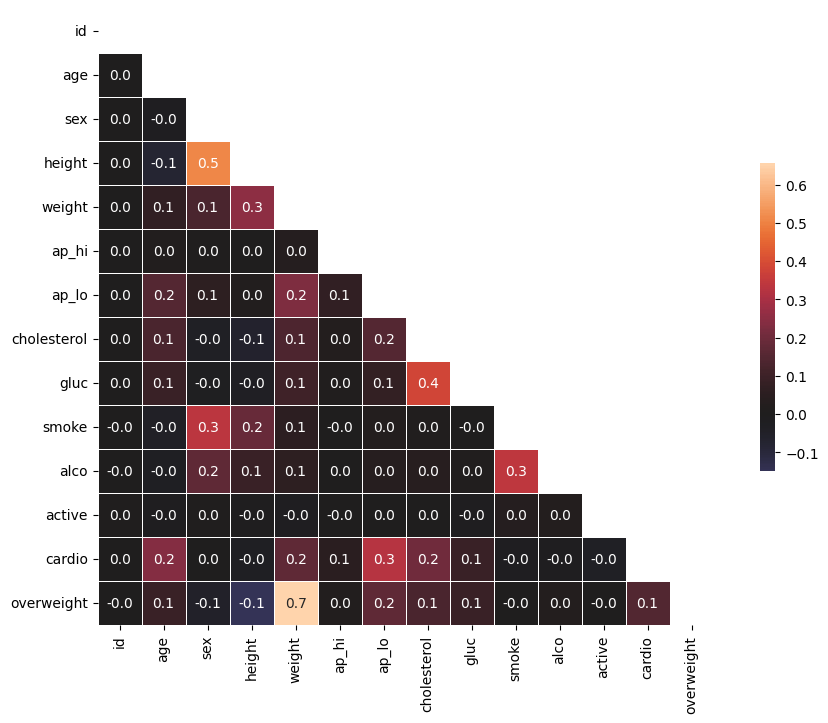

Mapa de calor criado!


In [6]:
# CÉLULA 6: Executar mapa de calor
heat_fig = draw_heat_map()
plt.show()
print("Mapa de calor criado!")

In [7]:
# CÉLULA 7: Verificar arquivos salvos
import os
files = os.listdir('.')
png_files = [f for f in files if f.endswith('.png')]
print("Arquivos PNG criados:", png_files)

Arquivos PNG criados: ['catplot.png', 'heatmap.png']
